
รหัส:6304101354

ชื่อ สกุล: ภัทรธิดา พงศ์พัสนันท์

กลุ่ม: 2

##การจัดการหน่วยความจำและหน่วยความจำเสมือน

##วัตถุประสงค์
1. เพื่อศึกษาการจัดการหน่วยความจำเสมือน
2. เพื่อการประยุกต์ใช้ในการจัดการทางด้านภาษาศาสตร์

##งาน
1. ให้จัดทำ _fifo () โดยมีเงื่อนไขคือ
- ให้หาจำนวนของ Total page faults (Miss) เท่ากับ จำนวนชื่อ และนามสกุลของนักศึกษา ในภาษาอังกฤษ พร้อมทั้งแสดงชื่อและนามสกุล (5 คะแนน)
- ให้หาผลรวมของ จำนวน page hit มากกว่าเท่ากับ 10 (10 คะแนน)
2. ให้จัดทำ _lru โดยมีเงื่อนไขคือ
- ให้หาจำนวนของ Total page faults (Miss) เท่ากับ จำนวนชื่อ และนามสกุลของนักศึกษา ในภาษาอังกฤษ พร้อมทั้งแสดงชื่อและนามสกุล (15 คะแนน)
- ให้หาผลรวมของ จำนวน page hit มากกว่าเท่ากับ 10 (20 คะแนน)   

อัลกอริทึมเข้าก่อนออกก่อน (First In First Out algorithm)
- หน้าที่เก่าที่สุดในหน่วยความจำหลักคือ หน้าที่จะถูกเลือกเพื่อแทนที่ 
- ใช้งานง่าย เก็บรายการ แทนที่หน้าจากส่วนท้าย และเพิ่มหน้าใหม่ที่ส่วนหัว


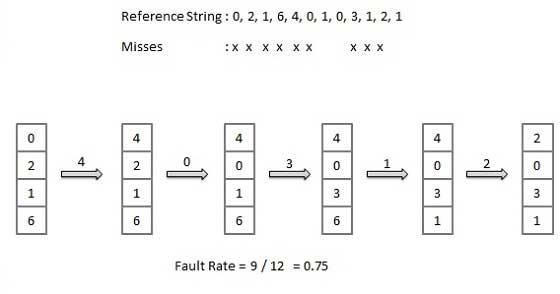

จากลำดับข้อมูล [0, 2, 1, 6], [4], [0], 1, 0, [3], [1], [2], 1
1.	Pf (4) [-]/0, [-]/2, [-]/1, [-]/6 -> [**0***, 2, 1, 6] 
2. 	Pf (5) [0]/**4** -> [4, **2***, 1, 6]
3.	Pf (6) [2]/**0** -> [4, 0, **1***, 6]
4.	Pf (6) [1]/**1***-> [4, 0, **1***, 6]
5.	Pf (6) [0]/**0***-> [4, 0, **1***, 6]
6.	Pf (7) [1]/**3**-> [4, 0, 3, **6***]
7.	Pf (8) [6]/**1**-> [**4***, 0, 3, 1]
8.	Pf (9) [4]/**2**-> [2, **0***, 3, 1]
9.	Pf (9) [1]/ **1***-> [2, **0***, 3, 1]

อัลกอริธึมใช้น้อยที่สุด (Least Recently Used algorithm)
-	เพจที่ไม่ได้ใช้เป็นเวลานานที่สุดในอดีต คือเพจที่จะถูกเลือกเพื่อแทนที่
-	ใช้งานง่าย เก็บรายการ แทนที่หน้าด้วยการย้อนเวลากลับไป

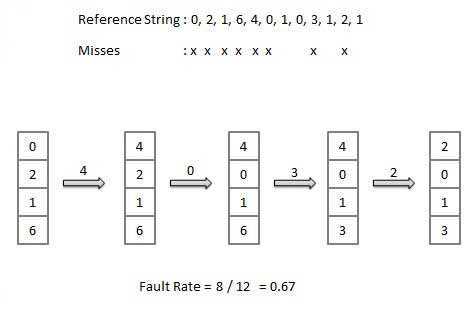

จากลำดับข้อมูล [0, 2, 1, 6], [4], [0], 1, 0, [3], 1, [2], 1
1.	Pf (4) [-]/0, [-]/2, [-]/1, [-]/6 -> [0*, 2, 1, 6] 
2.	Pf (5) [0]/4 -> [4, 2*, 1, 6]
3.	Pf (6) [2]/0 -> [4, 0, 1*, 6]
4.	Pf (6) [1]/1 -> [4, 0, 1, 6*]
5.	Pf (6) [0]/0 -> [4, 0, 1, 6*]
6.	Pf (7) [6]/3 -> [4*, 0, 1, 3]
7.	Pf (7) [1]/1 -> [4*, 0, 1, 3]
8.	Pf (8) [4]/2 -> [4, 0*, 1, 3]
9.	Pf (8) [1]/1 -> [4, 0*, 1, 3]

In [ ]:
#First In First Out Page Replacement Algorithm
def __fifo(a, n, m):
    f = -1
    page_faults = 0
    page_hits = 0
    page = []
    #Replace all page by -1
    for i in range(m):
        page.append(-1)
    
    for i in range(n):
        flag = 0
        for j in range(m):
            #Recheck new page a[i] in page[j]  
            if(page[j] == a[i]):# if found new page a[i] in page [j] then set flage is 1
                flag = 1
                break

        if flag == 0: #if not found new page a[i] in page [j] then replace page a[i] into the first page out
            f=(f+1)%m # m is maximum page size m=3
            page[f] = a[i]
            page_faults += 1 #summary page faluts
            print (f"Miss - {a[i]}"),
            for j in range(m):
                if page[j] != -1:
                    print(f"{page[j]}"),
                else:
                    print (f"-"),
        else:
            print (f"Hit - {(a[i])}"),
            page_hits +=1
            for j in range(m):
                if page[j] != -1:
                    print(f"{page[j]}"),
                else:
                    print (f"-"),

    print (f"Total page faults : {page_faults}")
    print (f"Page fault rate({n}) : {page_faults/n*100}")
    print (f"Total page hits : {page_hits}")
    print (f"Page hit rate({n}) : {page_hits/n*100}")

#Least Recently Used Page Replacement Algorithm
def __lru(a, n, m):
    x = 0
    page_faults = 0
    page_hits = 0
    page = []
    for i in range(m):
        page.append(-1)

    for i in range(n):
        flag = 0
        for j in range(m):
            if(page[j] == a[i]):
                flag = 1
                break
            
        if flag == 0:
            if page[x] != -1:
                #------------------------------
                #Minimum value
                min = 999
                for k in range(m): # m is maximum page size
                    flag = 0
                    j =  i
                    while j>=0:
                        j-=1
                        if(page[k] == a[j]):
                            flag = 1
                            break
                    if (flag == 1 and min > j):
                        min = j
                        x = k
                 #------------------------------
            page[x] = a[i]
            x=(x+1)%m
            page_faults+=1 #Page faults
            print (f"Miss-{a[i]}"),
            for j in range(m):
                if page[j] != -1:
                    print (page[j]),
                else:
                    print ("-"),
        else:
            page_hits += 1
            print (f"Hit - {a[i]}"),
            for j in range(m):
                if page[j] != -1:
                    print (page[j]),
                else:
                    print ("-"),            
    print (f"Total page faults : {page_faults}")
    print (f"Total page hits : {page_hits}")

In [ ]:
#@title ข้อความอธิบายภาพเริ่มต้น
#0-a,1-b,2-c,3-d,4-e,5-f,6-g,7-h,8-i,9-j,10-k,11-l,12-m,13-n,14-o,15-p,16-q,17-r,18-s,19-t,20-u,21-v,22-w,23-x,24-y,25-z

#a =[ 1,  3 , 0,  3,  5,  6,  3]
a = ['p','h','a','t','t','a','r','a','t','i','d','a','p','o','n','g','p','a','t','s','a','n','a','n','s','a','n','a','n']
n = len (a) #The size of reference string   
m = 3 #Page frame size
print("__fifo")
__fifo(a, n, m)

#a = [7,  0,  1,  2,  0,  3,  0,  4,  2,  3,  0,  3, 2]
a = ['p','h','a','t','t','a','r','a','t','i','d','a','p','o','n','g','p','a','t','s','a','n','a','n','s','a','n','a','n']
n = len (a) #The size of reference string   
m = 4 #Page frame size
print("__lru")
__lru(a, n, m)

__fifo
Miss - p
p
-
-
Miss - h
p
h
-
Miss - a
p
h
a
Miss - t
t
h
a
Hit - t
t
h
a
Hit - a
t
h
a
Miss - r
t
r
a
Hit - a
t
r
a
Hit - t
t
r
a
Miss - i
t
r
i
Miss - d
d
r
i
Miss - a
d
a
i
Miss - p
d
a
p
Miss - o
o
a
p
Miss - n
o
n
p
Miss - g
o
n
g
Miss - p
p
n
g
Miss - a
p
a
g
Miss - t
p
a
t
Miss - s
s
a
t
Hit - a
s
a
t
Miss - n
s
n
t
Miss - a
s
n
a
Hit - n
s
n
a
Hit - s
s
n
a
Hit - a
s
n
a
Hit - n
s
n
a
Hit - a
s
n
a
Hit - n
s
n
a
Total page faults : 18
Page fault rate(29) : 62.06896551724138
Total page hits : 11
Page hit rate(29) : 37.93103448275862
__lru
Miss-p
p
-
-
-
Miss-h
p
h
-
-
Miss-a
p
h
a
-
Miss-t
p
h
a
t
Hit - t
p
h
a
t
Hit - a
p
h
a
t
Miss-r
r
h
a
t
Hit - a
r
h
a
t
Hit - t
r
h
a
t
Miss-i
r
i
a
t
Miss-d
d
i
a
t
Hit - a
d
i
a
t
Miss-p
d
i
a
p
Miss-o
d
o
a
p
Miss-n
n
o
a
p
Miss-g
n
o
g
p
Hit - p
n
o
g
p
Miss-a
n
a
g
p
Miss-t
t
a
g
p
Miss-s
t
a
s
p
Hit - a
t
a
s
p
Miss-n
t
a
s
n
Hit - a
t
a
s
n
Hit - n
t
a
s
n
Hit - s
t
a
s
n
Hit - a
t
a
s
n
Hit - n
t
a
s
n
Hit - a
t
a
s
n
Hit - n
